# Deep Learning with Python (2nd ed.)
[Website](https://www.manning.com/books/deep-learning-with-python-second-edition)

# Chapter 2.1 A first look at a neural network

__Problem:__ classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

__“Solving” MNIST__: the “Hello World” of DL;  it’s what you do to verify that your algorithms are working as expected.

In [45]:
from tensorflow.keras.datasets import mnist

# import MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

An array with __3 dims__: 
1. __60_000 rows__, where each row has 
2. __28 lists__, where each list has 
3. __28 elements__ 

In [46]:
# check training's data shape
train_images.shape

(60000, 28, 28)

In [47]:
# check dims
train_images.ndim

3

Each image is an array with __2 dims__: 
1. __28 lists__, where each list has
2. __28 elements__ 

In [48]:
# single image
train_images[0].ndim

2

In [49]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [50]:
# check testing data
print(test_images.shape)
print(test_labels)

(10000, 28, 28)
[7 2 1 ... 4 5 6]


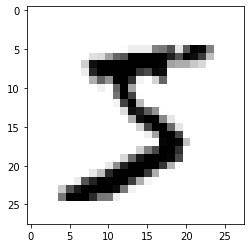

5


In [55]:
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print(train_labels[0])

__Layer(s)__: The core building block of neural networks; a __filter for data__: some data goes in, and it comes out in a more useful form. 

Here, our model consists of a sequence of __two Dense layers__, which are densely connected (__fully connected__). The $2^{nd}$ layer is a __10-way SoftMax classification layer__, which means it will return an array of 10 probability scores (summing to 1). 

In [27]:
# build NN
from tensorflow import keras
from tensorflow.keras import layers

# 2-layer NN
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    # 10-way: returns an array of 10 prob scores
    layers.Dense(10, activation="softmax")
])

__Compilation step__:

- __Optimizer:__ The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
- __Loss function__: How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- __Metrics:__ to monitor during training and testing.

In [28]:
# select optimizer
model.compile(optimizer="rmsprop",
             # select loss function
             loss="sparse_categorical_crossentropy",
             # select eval metrics
             metrics=["accuracy"])

__Reshape & Scale data__

Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 

We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [29]:
# reshape data
train_images = train_images.reshape((60_000, 28*28))
test_images = test_images.reshape((10_000, 28*28))

# scale data
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [30]:
# check new shape
train_images.shape

(60000, 784)

In [31]:
# check new dims
train_images.ndim

2

Two quantities are displayed during training: 
1. the __loss__ of the model over the training data
2. the __accuracy__ of the model over the training data..

In [32]:
# train model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2566 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1042 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0684 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0381 - accuracy: 0.9884


Each number of index $i$ in that array corresponds to the probability that digit image `test_digits[0]` belongs to class $i$.

This first test digit has the highest probability score (0.99999106, almost 1) at index $7$, so according to our model, it must be a 7.

In [36]:
# predict
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

# predict first image
predictions[0]

array([1.8840443e-09, 2.7312252e-10, 3.6522958e-06, 3.2045860e-05,
       3.3501509e-12, 1.7420547e-08, 2.1619712e-13, 9.9996412e-01,
       4.4723816e-08, 9.1874675e-08], dtype=float32)

In [38]:
# check highest prob
print(predictions[0].argmax())
predictions[0][7]

7


0.9999641

In [39]:
# check test label
test_labels[0]

7

In [40]:
# predict second image
predictions[1]

array([1.3480340e-10, 3.6700669e-07, 9.9999964e-01, 8.2723588e-09,
       4.8402496e-20, 5.9640270e-10, 4.3323498e-11, 9.0578636e-20,
       6.8232158e-09, 1.3983097e-18], dtype=float32)

In [41]:
test_labels[1]

2

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9788
